In [2]:
import math
import os
import numpy as np
from latticeFunctions import generatePnL, stepDiff, stepDiffHole, plotLattice, pLTitlrIte, calcEnt

import matplotlib.pyplot as plt

In [4]:
(P, L) = generatePnL(200, 3, 100)

t = range(10 ** 3)
entr = np.zeros(len(t) + 1)
entr[0] = calcEnt(P, L)

for numSteps in t:
    P = stepDiff(P, L)
    entr[numSteps + 1] = calcEnt(P, L)
    if((math.log(numSteps + 1, 2) % 1) == 0):
        filr = os.getcwd() + "\\baseLattice\orient" + str(numSteps + 1) + ".png"
        plotLattice(P, L, "", 500, filr)

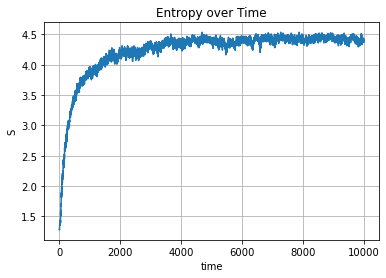

In [16]:
fig, ax = plt.subplots()
plt.plot(np.linspace(0, len(t), num = len(t) + 1), entr)
plt.title('Entropy over Time')
plt.xlabel('time')
plt.ylabel('S')
plt.grid()
plt.show()

In [ ]:
(P, L) = generatePnL(50, 3, 1000)

t = range(10 ** 7)
cnt = []
cnt.append(len(P))

plotLattice(P, L, 10 ** (-32))

H = 11

for numSteps in t:
    P = stepDiffHole(P, L, H)
    cnt.append(len(P))
    if((math.log10(numSteps + 1) % 1) == 0):
        plotLattice(P, L, numSteps + 1)
    if(len(P) == 0):
        break

plotLattice(P, L, numSteps + 1)